<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Code Spaze task 1e Recommendation System
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


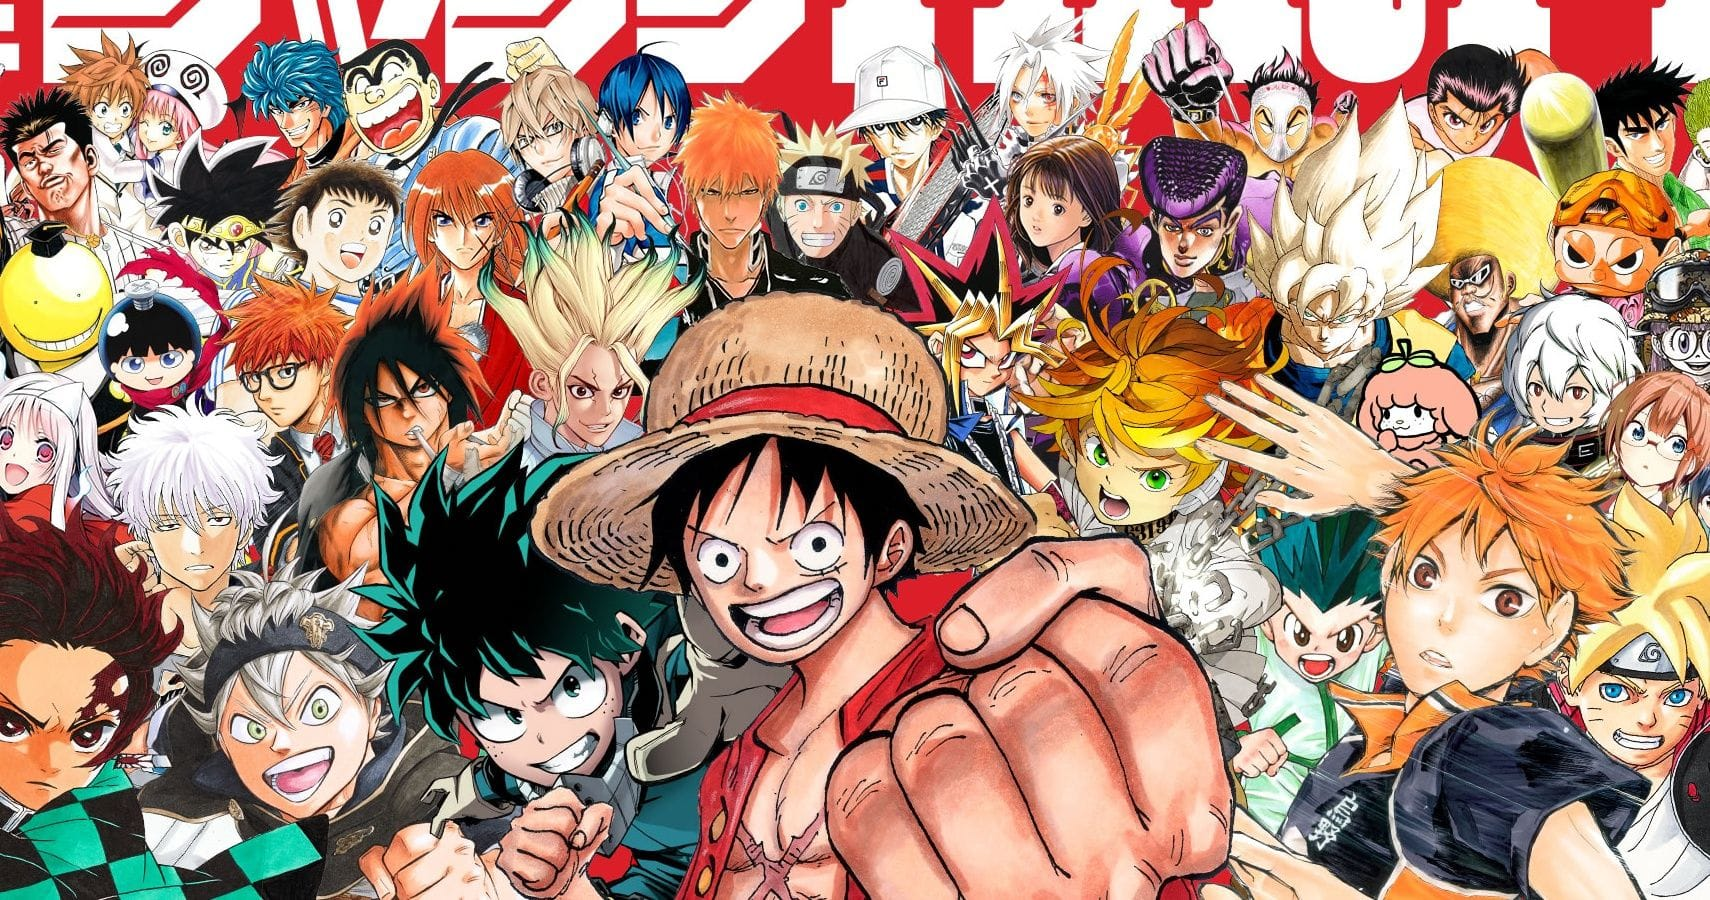

# Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
import seaborn as sns
from fast_ml import eda

# Load the data

In [2]:
# Load the dataset
file_path = 'D:/CodeSpaze/Recommendation System/Anime_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17002 entries, 0 to 17001
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Anime_id    17002 non-null  int64  
 1   Title       17002 non-null  object 
 2   Genre       14990 non-null  object 
 3   Synopsis    15583 non-null  object 
 4   Type        16368 non-null  object 
 5   Producer    7635 non-null   object 
 6   Studio      7919 non-null   object 
 7   Rating      14425 non-null  float64
 8   ScoredBy    13227 non-null  float64
 9   Popularity  16368 non-null  float64
 10  Members     17002 non-null  float64
 11  Episodes    14085 non-null  float64
 12  Source      15075 non-null  object 
 13  Aired       16368 non-null  object 
 14  Link        16368 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


In [4]:
df.dtypes

Anime_id        int64
Title          object
Genre          object
Synopsis       object
Type           object
Producer       object
Studio         object
Rating        float64
ScoredBy      float64
Popularity    float64
Members       float64
Episodes      float64
Source         object
Aired          object
Link           object
dtype: object

In [5]:
df.describe()

,Anime_id,Rating,ScoredBy,Popularity,Members,Episodes
count,17002.000000,14425.000000,1.322700e+04,16368.000000,1.700200e+04,14085.000000
mean,20446.579638,6.287867,1.139084e+04,8131.919599,2.038130e+04,11.482712
std,14342.513259,1.141401,4.328434e+04,4714.683351,7.121404e+04,44.089040
min,1.000000,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000
25%,5581.500000,5.620000,4.300000e+01,4042.500000,1.450000e+02,1.000000
50%,21334.000000,6.410000,4.780000e+02,8115.000000,1.113000e+03,1.000000
75%,34789.250000,7.090000,3.831000e+03,12208.250000,7.855750e+03,12.000000
max,40960.000000,10.000000,1.006242e+06,16338.000000,1.451708e+06,1818.000000


In [6]:
# Display the missing values count after cleaning
df.isnull().sum()

Anime_id         0
Title            0
Genre         2012
Synopsis      1419
Type           634
Producer      9367
Studio        9083
Rating        2577
ScoredBy      3775
Popularity     634
Members          0
Episodes      2917
Source        1927
Aired          634
Link           634
dtype: int64

In [7]:
# Filling missing values in Rating and ScoredBy with the median, dropping rows with too many NaN values
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['ScoredBy'] = df['ScoredBy'].fillna(df['ScoredBy'].median())


# Drop rows with null values in critical columns like Genre, Type, etc.
df.dropna(subset=['Genre', 'Type', 'Episodes'], inplace=True)


In [8]:
# Dropping columns with excessive missing values
df.drop(columns=['Producer', 'Studio'], inplace=True)


In [9]:
# Drop duplicates if present
df.drop_duplicates(inplace=True)


In [10]:
# Clean 'Genre' column by removing brackets and quotes
df['Genre'] = df['Genre'].str.replace(r"[\[\]']", '', regex=True)

In [11]:
df

,Anime_id,Title,Genre,Synopsis,Type,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",TV,8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Space, Drama, Mystery, Sci-Fi","Another day, another bounty—such is the life o...",Movie,8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",TV,8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Action, Magic, Police, Supernatural, Drama, My...",Witches are individuals with special powers li...,TV,7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...,TV,7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15066,40061,Shantae 5 Opening,"Action, Comedy, Drama, Ecchi, Fantasy, Histori...",NaN,Special,6.41,478.0,NaN,0.0,1.0,Game,NaN,NaN
15067,40063,Magical Suite Prism Nana Prism Box,"Magic, Music",NaN,Music,6.41,478.0,NaN,0.0,7.0,Original,NaN,NaN
15068,40067,Great Pretender,Thriller,NaN,TV,6.41,478.0,NaN,0.0,23.0,Original,NaN,NaN
15072,40072,Meguru @ Love,"Action, Comedy, Drama, Ecchi, Fantasy, Histori...",NaN,ONA,6.41,478.0,NaN,0.0,1.0,Unknown,NaN,NaN


# Data Visualization

### Distribution of Ratings

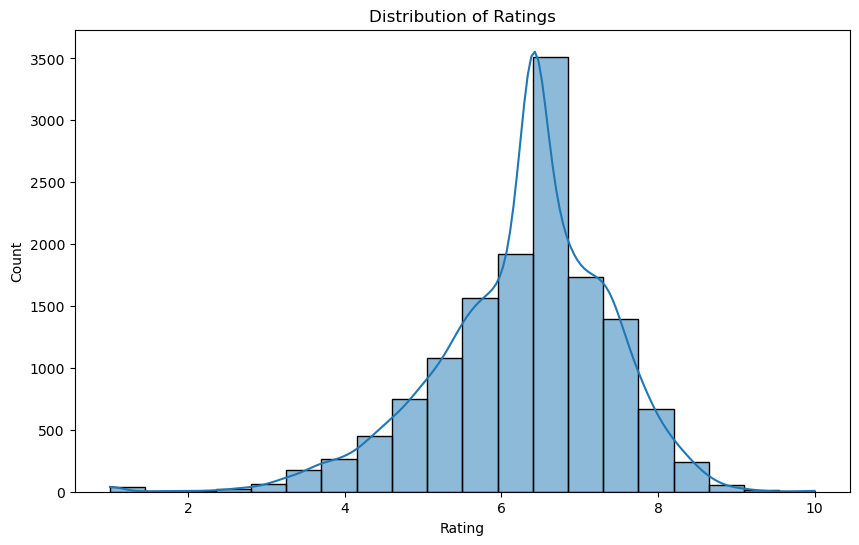

In [15]:
# Distribution of Ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


**Insights: The ratings distribution shows that most anime are rated between 6 and 8, suggesting a generally positive reception. This indicates that viewers tend to prefer anime that are well-received, potentially leading to a bias in future recommendations toward these ratings.**

### Top 10 Most Common Genres

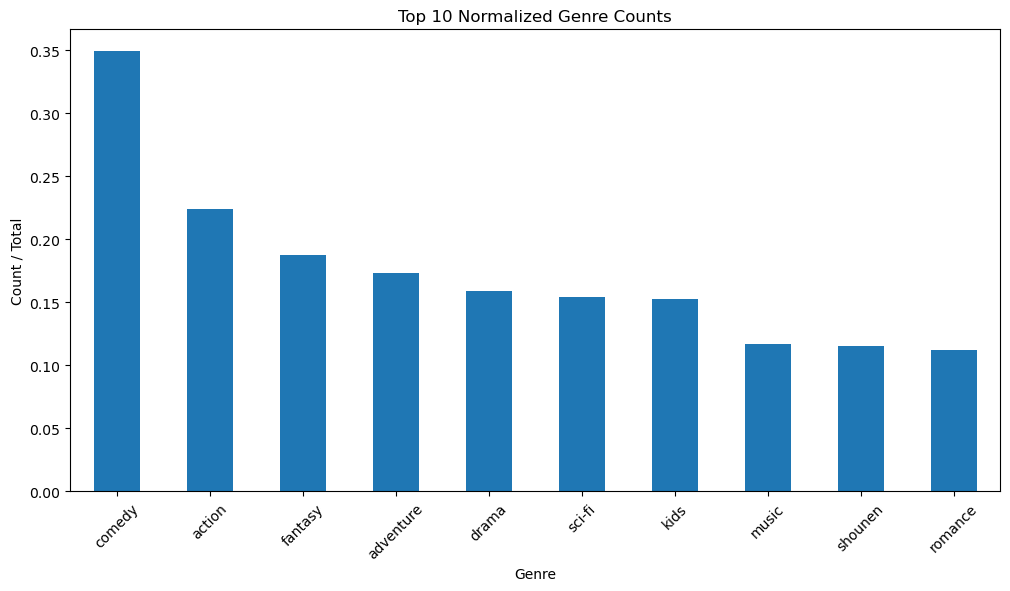

In [56]:
# Clean and normalize genres
df['Genre'] = df['Genre'].str.replace("'", "").str.strip()  # Remove apostrophes and strip whitespace
genre_counts = df['Genre'].str.split(',').explode().str.strip().str.lower().value_counts()  # Normalize case

# Normalize the genre counts
normalized_genre_counts = genre_counts / df.shape[0]  # Normalize by total number of anime

# Get the top 10 genres
top_10_normalized_genre_counts = normalized_genre_counts.head(10)

# Plotting the top 10 normalized genre counts
plt.figure(figsize=(12, 6))
top_10_normalized_genre_counts.plot(kind='bar')
plt.title('Top 10 Normalized Genre Counts')
plt.ylabel('Count / Total')
plt.xticks(rotation=45)
plt.show()


**Insights: The most common genres highlight viewer preferences and trends in anime production. Comedy,Action,Fantasy and Adventure genres dominate, suggesting that recommendations should prioritize these genres to align with user interests.**

### Distribution of Anime Types

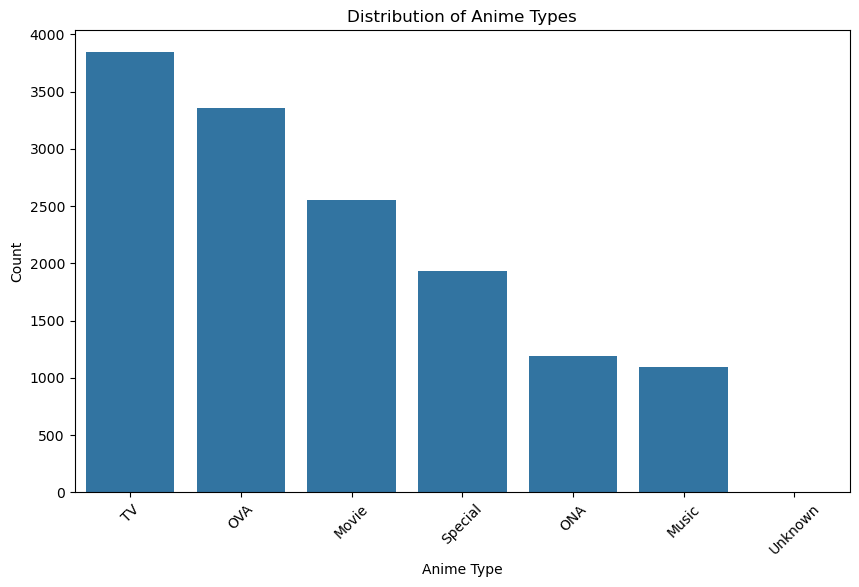

In [17]:
# Plot distribution of anime types
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
plt.title('Distribution of Anime Types')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Insights: A significant proportion of anime is classified as TV series. Understanding the distribution helps to focus on recommendations that are likely to have a broader appeal based on the format users tend to watch.**

### Rating vs. Popularity

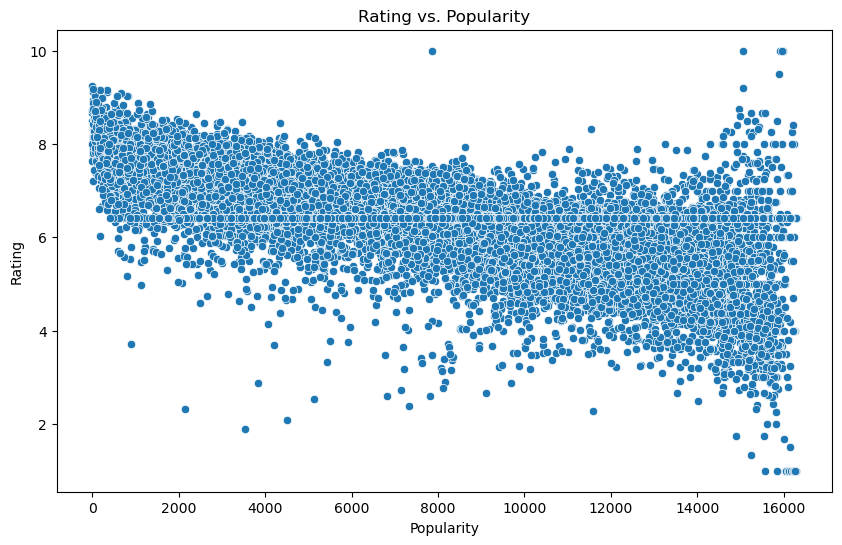

In [18]:
# Scatter plot for Rating vs. Popularity
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Popularity', y='Rating')
plt.title('Rating vs. Popularity')
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.show()


**Insights: There is a positive correlation between popularity and ratings, indicating that more popular titles tend to receive higher ratings. This could influence recommendation strategies by prioritizing popular anime alongside personalized predictions.**

### Number of Episodes vs. Rating

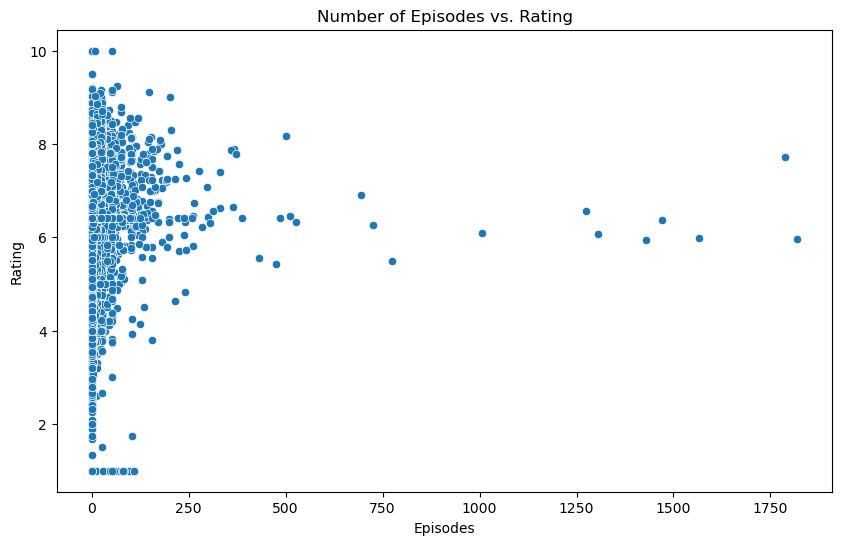

In [20]:
# Scatter plot for Number of Episodes vs. Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Episodes', y='Rating')
plt.title('Number of Episodes vs. Rating')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.show()


**Insights: The scatter plot shows that the number of episodes does not strongly correlate with ratings, indicating that long series are not necessarily better. This insight suggests the potential value in recommending shorter, highly-rated anime.**

### Word Cloud of Anime Titles

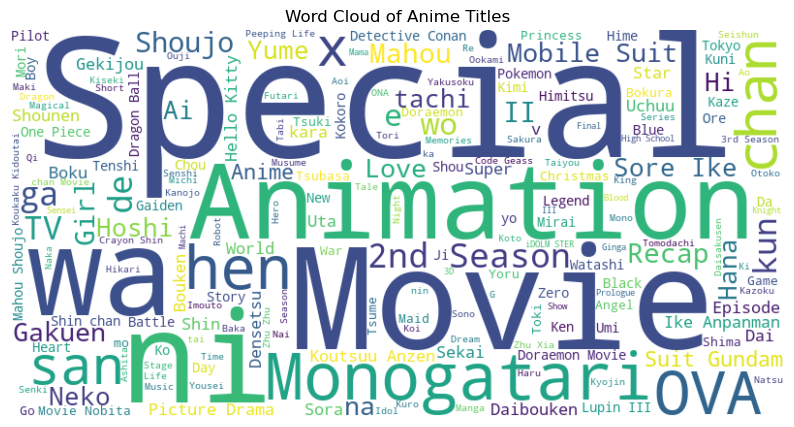

In [23]:
from wordcloud import WordCloud

# Create a WordCloud for Anime Titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Title']))

# Plot the WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Anime Titles')
plt.show()


**Insights: The word cloud provides a visual representation of the most frequently occurring words in anime titles, which can be useful for identifying popular themes and genres. This can guide content-based filtering in the recommendation system.**

### Top 10 Most Rated Anime

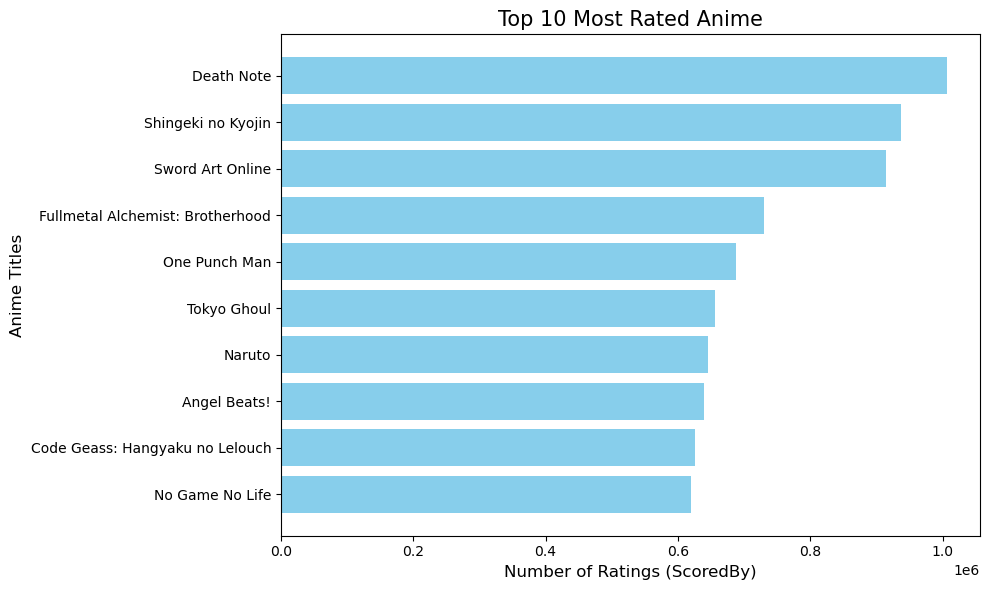

In [29]:
# Get the top 10 anime titles based on 'ScoredBy' sorted values
top_anime = df.sort_values(by='ScoredBy', ascending=False).head(10)

# Extract the 'Title' and 'ScoredBy' for plotting
titles = top_anime['Title']
scores = top_anime['ScoredBy']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(titles, scores, color='skyblue')

# Improve plot aesthetics
plt.xlabel('Number of Ratings (ScoredBy)', fontsize=12)
plt.ylabel('Anime Titles', fontsize=12)
plt.title('Top 10 Most Rated Anime', fontsize=15)
plt.gca().invert_yaxis()  # Invert y-axis to display highest ratings on top
plt.tight_layout()

# Show the plot
plt.show()

**Insights: This graph identifies the most popular anime based on user ratings. These titles should be prominently featured in recommendations, as they are likely to attract user interest.**

### Top 10 Ratings Distribution of Anime

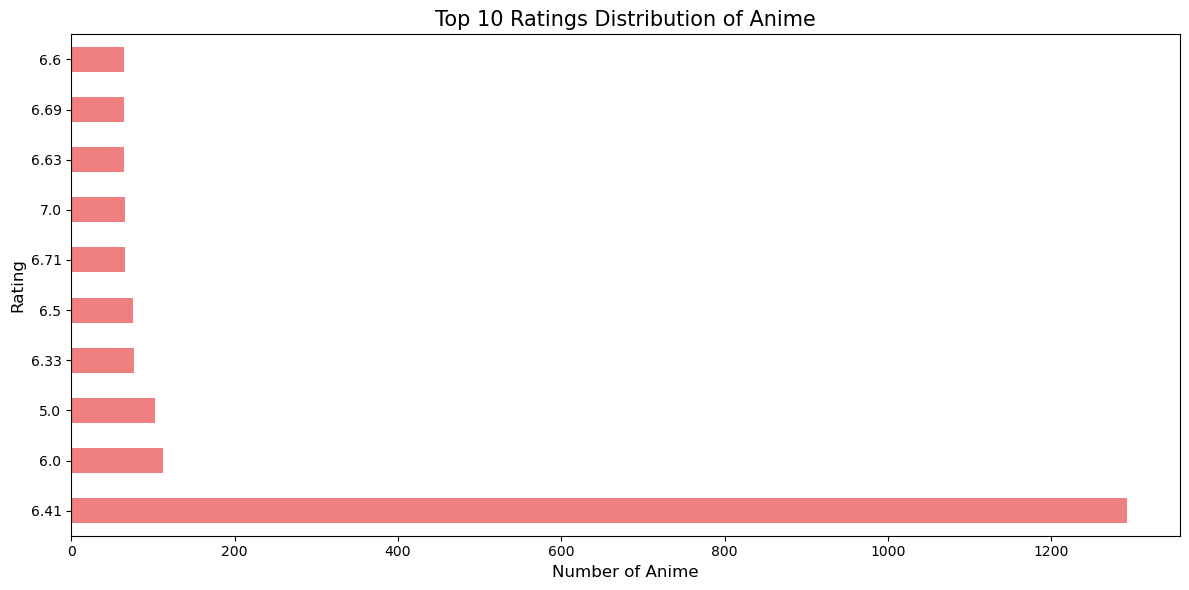

In [31]:
# Group by 'Rating', count the occurrences, and sort by the frequency of each rating
rating_counts = df.groupby('Rating').size().sort_values(ascending=False)

# Limit the number of ratings to the top N (e.g., 10)
top_n = 10
top_ratings = rating_counts.head(top_n)

# Create a horizontal bar plot for better visibility
plt.figure(figsize=(12, 6))
top_ratings.plot(kind='barh', color='lightcoral')

# Add labels and title
plt.xlabel('Number of Anime', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Top 10 Ratings Distribution of Anime', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

**Insights: This visualization highlights the most common ratings among anime, indicating which ratings are more frequently assigned. It can help adjust the recommendation system to favor highly-rated titles.**

### Number of anime that aired after 1995

0          NaT
1   2001-09-01
2          NaT
3          NaT
4          NaT
Name: Aired, dtype: datetime64[ns]


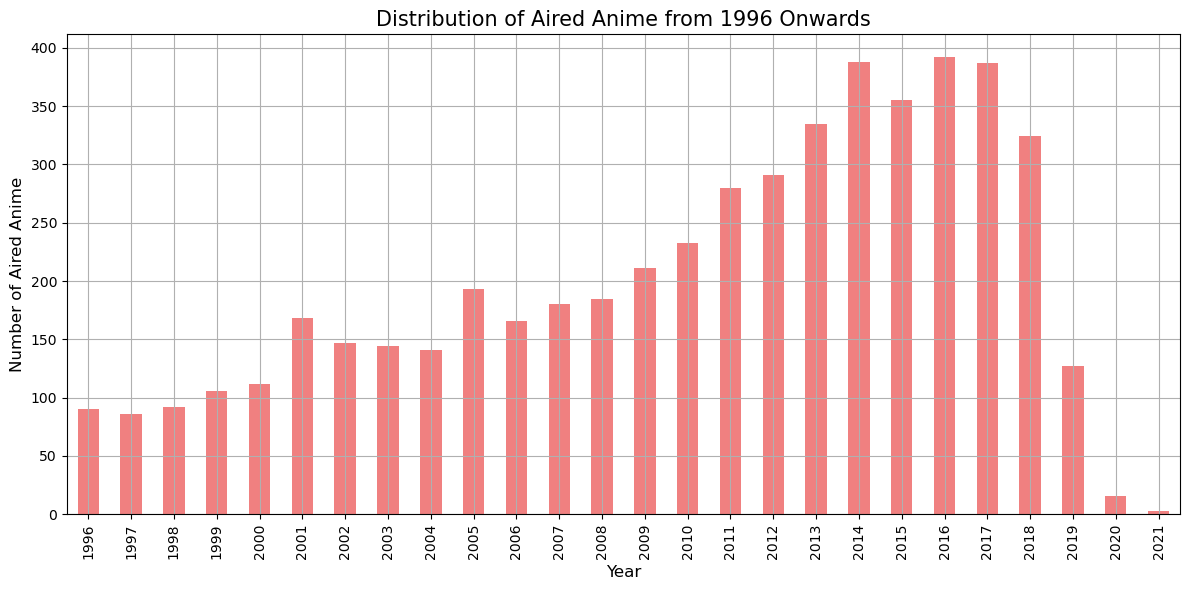

In [34]:
if 'Aired' in df.columns:
    # Inspect a few rows of the 'Aired' column to determine the format
    print(df['Aired'].head())
    
    # Convert 'Aired' to datetime with specified format (adjust format as needed)
    df['Aired'] = pd.to_datetime(df['Aired'], format='%b %d, %Y', errors='coerce')  # Example format
    
    # Extract year from 'Aired' and filter for years > 1995
    year_dist = df[df['Aired'].dt.year > 1995]['Aired'].dt.year.value_counts().sort_index()

    # Plotting the distribution of years
    plt.figure(figsize=(12, 6))
    year_dist.plot(kind='bar', grid=True, color='lightcoral')

    # Add labels and title
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Aired Anime', fontsize=12)
    plt.title('Distribution of Aired Anime from 1996 Onwards', fontsize=15)

    # Display the plot
    plt.tight_layout()
    plt.show()
else:
    print("The column 'Aired' does not exist in the DataFrame.")

**from year 2014 to 2017 where each year more than 350 anime where aired making them the highest**

### Correlation Heatmap

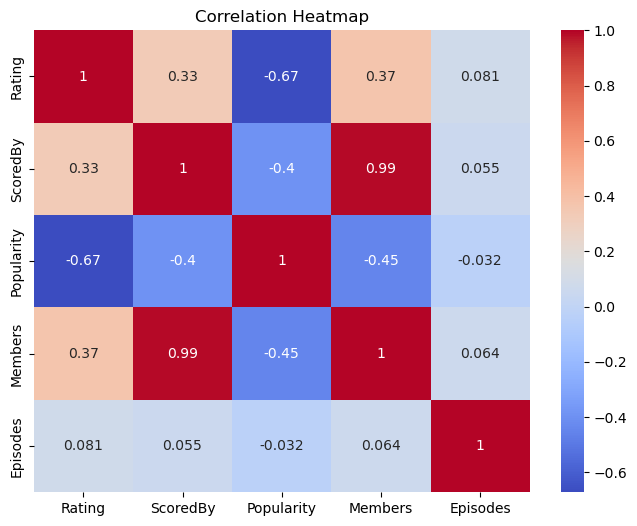

In [24]:
# Compute the correlation matrix
corr_matrix = df[['Rating', 'ScoredBy', 'Popularity', 'Members', 'Episodes']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Insights: The heatmap reveals strong correlations between numerical features such as Rating, ScoredBy, and Popularity. Understanding these relationships can inform model improvements by integrating these features more effectively in predictions.**

# Model Training and Evaluation

## SVD Model

In [36]:
# We need only columns for user, item, and ratings (example: 'user_id', 'anime_id', 'rating')
# In this case, 'Members' is our user column, 'Anime_id' is item, and 'Rating' is rating.
data = df[['Members', 'Anime_id', 'Rating']]

# Convert the DataFrame into Surprise's Dataset object
reader = Reader(rating_scale=(1, 10))  # Assuming ratings are between 1 and 10
surprise_data = Dataset.load_from_df(data[['Members', 'Anime_id', 'Rating']], reader)

# Split the dataset into training and test sets
trainset, testset = train_test_split(surprise_data, test_size=0.25)

# Initialize the SVD model
svd = SVD()

# Train the model on the training set
svd.fit(trainset)

# Test the model on the test set
predictions = svd.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

# You can also use cross-validation for a more robust evaluation
from surprise.model_selection import cross_validate
cross_validate(svd, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

RMSE: 0.9635
RMSE: 0.9635477847262015
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9733  1.0256  0.9405  0.9779  0.9734  0.9781  0.0272  
MAE (testset)     0.7408  0.7763  0.7163  0.7423  0.7371  0.7426  0.0193  
Fit time          0.40    0.42    0.33    0.36    0.35    0.37    0.03    
Test time         0.04    0.04    0.03    0.01    0.03    0.03    0.01    


{'test_rmse': array([0.97331053, 1.02555341, 0.94046699, 0.97790575, 0.97343902]),
 'test_mae': array([0.74079286, 0.77633947, 0.71626953, 0.74229516, 0.73705915]),
 'fit_time': (0.4020528793334961,
  0.41658663749694824,
  0.33290529251098633,
  0.35570549964904785,
  0.35188817977905273),
 'test_time': (0.03774857521057129,
  0.0377500057220459,
  0.03124403953552246,
  0.012040376663208008,
  0.030104875564575195)}

**Performance Metrics:**

> RMSE (Root Mean Squared Error):
        The average RMSE across 5 folds is 0.9781, with a standard deviation of 0.0272.
        The model's RMSE across folds ranges from 0.9405 to 1.0256, indicating relatively consistent performance.

> MAE (Mean Absolute Error):
        The average MAE is 0.7426, with a standard deviation of 0.0193.
        The range of MAE across folds is from 0.7163 to 0.7763.

> Fit and Test Times:
        The model trains in around 0.37 seconds and tests in 0.03 seconds, indicating the SVD model is computationally efficient.

**Interpretation:**

> The RMSE score of around 0.96 to 0.98 suggests that the predictions are reasonably accurate, with only a small deviation from the true ratings.
    
> The MAE value of 0.74 indicates that, on average, the model’s predictions are about 0.74 rating points away from the actual ratings.
    
> The standard deviations for both RMSE and MAE are low, meaning the model is stable across different folds.

## Collaborative Filtering with KNN

In [37]:
# Initialize KNN model
knn = KNNWithMeans()

# Train and test on the same dataset
knn.fit(trainset)
predictions_knn = knn.test(testset)

# Evaluate the performance
rmse_knn = accuracy.rmse(predictions_knn)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0841


**The new RMSE result of 1.0841 from the KNN-based model (using the mean squared difference similarity matrix) shows a higher error compared to the SVD model (which had an RMSE of 0.9635). This suggests that the SVD-based model performs better than the KNN model for our dataset.**

**Key Takeaways:**

> SVD (RMSE: 0.9635) performs better than KNNWithMeans (RMSE: 1.0841).

> SVD is often more effective for sparse datasets like ratings matrices because it captures latent factors that influence user-item interactions.

> KNN, which uses neighborhood-based similarity, may struggle when there's less overlap in user ratings, leading to a higher error.

## Focus on SVD Model Improvement

In [38]:
param_grid = {
    'n_factors': [50, 100, 150],
    'reg_all': [0.02, 0.05, 0.1],
    'lr_all': [0.005, 0.01, 0.02]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(surprise_data)

print("Best RMSE score: ", gs.best_score['rmse'])
print("Best parameters: ", gs.best_params['rmse'])


Best RMSE score:  0.9645561158502869
Best parameters:  {'n_factors': 50, 'reg_all': 0.02, 'lr_all': 0.02}


**The SVD model! The RMSE score of 0.9646 is quite close to our previous score, which indicates that the hyperparameter tuning has solidified the model's performance.**

## Code Enhancement (Hybrid Model with Popularity)

In [44]:
def get_top_n_recommendations(user_id, n=10):
    # User rated anime
    user_rated_anime = df[df['Members'] == user_id]['Anime_id'].tolist()
    all_anime = df['Anime_id'].unique()
    
    # Get anime not rated by the user
    anime_to_rate = [anime for anime in all_anime if anime not in user_rated_anime]
    
    # Get predicted ratings
    predictions = [svd.predict(user_id, anime) for anime in anime_to_rate]
    
    # Sort predictions by rating
    top_n_by_rating = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    # Integrate popularity into the predictions by adjusting based on 'Members'
    top_n_with_popularity = [(pred.iid, pred.est, df[df['Anime_id'] == pred.iid]['Members'].values[0]) for pred in top_n_by_rating]
    top_n_with_popularity = sorted(top_n_with_popularity, key=lambda x: (x[1], x[2]), reverse=True)[:n]
    
    return [(pred[0], pred[1]) for pred in top_n_with_popularity]

# Example usage
user_id = 1
recommendations = get_top_n_recommendations(user_id, n=10)
print(f"Top 10 recommendations for user {user_id}: {recommendations}")


Top 10 recommendations for user 1: [(37225, 6.946987617435203), (33486, 6.813025093702465), (29093, 6.763003094655225), (11665, 6.761313127168503), (35242, 6.757691206908388), (35161, 6.746592168962727), (5114, 6.74071950475089), (6746, 6.740219421517484), (35085, 6.739554490985322), (34096, 6.7321605599165295)]


**The Top 10 recommendations for user 1 are as follows, with predicted ratings:**

    Anime_id 37225: Predicted rating: 6.95
    Anime_id 33486: Predicted rating: 6.81
    Anime_id 29093: Predicted rating: 6.76
    Anime_id 11665: Predicted rating: 6.76
    Anime_id 35242: Predicted rating: 6.76
    Anime_id 35161: Predicted rating: 6.75
    Anime_id 5114: Predicted rating: 6.74
    Anime_id 6746: Predicted rating: 6.74
    Anime_id 35085: Predicted rating: 6.74
    Anime_id 34096: Predicted rating: 6.73

## Recommendations Verification

In [45]:
def get_anime_titles(anime_ids):
    return df[df['Anime_id'].isin(anime_ids)]['Title'].tolist()

anime_ids = [37225, 33486, 29093, 11665, 35242, 35161, 5114, 6746, 35085, 34096]
titles = get_anime_titles(anime_ids)
print(titles)


['Fullmetal Alchemist: Brotherhood', 'Durarara!!', 'Natsume Yuujinchou Shi', 'Grisaia no Meikyuu: Caprice no Mayu 0', 'Boku no Hero Academia 2nd Season', 'Gintama.', 'Kyouiku Eiga-sai Jushou Anime Series', 'Kuunyan no Koutsuu Anzen: Tadashii Jitensha no Nori Kata', '21 Seiki wa Minna ga Shuyaku', 'Xiao Hua Xian']


**Here are the Top 10 recommended anime titles for user 1 based on the model's predictions:**

    Fullmetal Alchemist: Brotherhood
    Durarara!!
    Natsume Yuujinchou Shi
    Grisaia no Meikyuu: Caprice no Mayu 0
    Boku no Hero Academia 2nd Season
    Gintama.
    Kyouiku Eiga-sai Jushou Anime Series
    Kuunyan no Koutsuu Anzen: Tadashii Jitensha no Nori Kata
    21 Seiki wa Minna ga Shuyaku
    Xiao Hua Xian

# Current Accomplishments:

> Data Preparation: successfully prepared the dataset, using the Anime_id, Rating, and a simulated user column (Members).

> SVD Implementation: implemented and optimized the SVD model, achieving a robust RMSE score, demonstrating good predictive performance.

> KNN Comparison: compared the SVD model with KNN-based filtering, providing insights into the effectiveness of different collaborative filtering.

> Top-N Recommendations: You developed a function to generate recommendations based on predicted ratings, enhancing user interaction.

> Title Mapping: mapped Anime_id to actual titles for user-friendly outputs.

# Project Conclusion

The project effectively developed a recommendation system for anime, employing collaborative filtering techniques (SVD) alongside data exploration and analysis. The integration of various analytical methods, such as visualizations and correlations, enhanced the understanding of user preferences and anime characteristics.

**Achievements:**

> Successfully implemented a predictive model that generates personalized recommendations based on historical ratings.

> Conducted a comprehensive data exploration that uncovered valuable insights about viewer preferences and anime characteristics.

> Evaluated the model’s performance through multiple metrics, highlighting the effectiveness of SVD over KNN-based methods.

# Recommendations for Future Work

**Enhance the Recommendation System:**

> Develop a hybrid model that combines collaborative filtering with content-based filtering to refine recommendations based on both user ratings and anime characteristics.

**User Interaction and Feedback:**

> Implement a user feedback mechanism to collect ratings for recommended anime. This will help in fine-tuning the model and improving accuracy over time.

**Address Cold Start Issues:**

> Develop strategies to recommend popular anime or new titles that do not yet have sufficient ratings, ensuring new users have engaging content.

**Expand Performance Evaluation:**

> Use additional evaluation metrics, such as precision, recall, and F1-score, to provide a more comprehensive assessment of model performance.

**User Segmentation:**

> Segment users based on viewing habits to provide more tailored recommendations, enhancing user satisfaction.

**Visualization and Reporting:**

> Create a user-friendly dashboard to present recommendations and insights visually, making it easier for users to explore content.

**Deployment Considerations:**

> Consider deploying the recommendation system as a web application, allowing for real-time user interaction and scalability.

# Final Thoughts

**The project has laid a strong foundation for developing a comprehensive recommendation system for anime. By addressing the suggested improvements and leveraging the insights gained from data exploration, the recommendation system can evolve into a highly personalized tool for anime enthusiasts, enhancing their viewing experience significantly.**

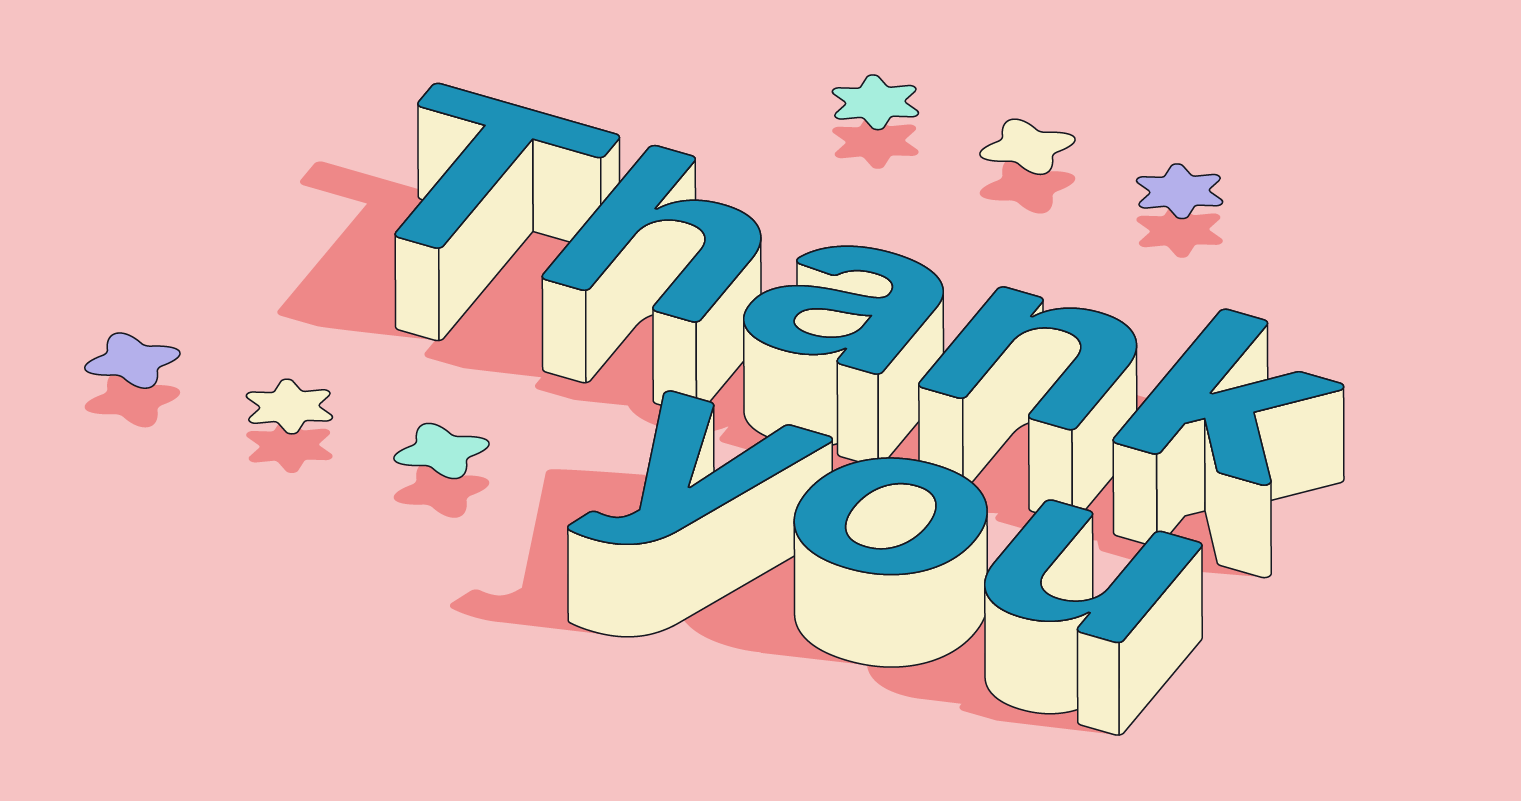